In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pylab as plt

In [2]:
plt.style.use('bmh')

In [3]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [4]:
df_ex = pd.read_csv('./sample_submission.csv')
df_ex.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [5]:
df_train = pd.read_csv('./sales_train.csv')
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
df_shop = pd.read_csv('./shops.csv')
df_shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
df_items = pd.read_csv('./items.csv')
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
df_cat = pd.read_csv('./item_categories.csv')
df_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
df_train_a = pd.merge(df_train, df_items, on='item_id')
df_train_a = pd.merge(df_train_a, df_cat, on='item_category_id')
df_train_a = pd.merge(df_train_a, df_shop, on='shop_id')

In [10]:
df_train_a = df_train_a.drop(columns=['item_id', 'item_category_id', 'shop_id'])
df_train_a['full_price'] = df_train_a['item_price']*df_train_a['item_cnt_day']
df_train_a.head()

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name,full_price
0,02.01.2013,0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.0
1,26.04.2013,3,150.0,1.0,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",150.0
2,26.06.2013,5,199.5,1.0,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",199.5
3,20.07.2013,6,199.5,1.0,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",199.5
4,14.09.2013,8,299.0,2.0,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",598.0


In [11]:
prices = df_train_a.groupby('shop_name')['full_price'].sum()
prices = prices.sort_values()

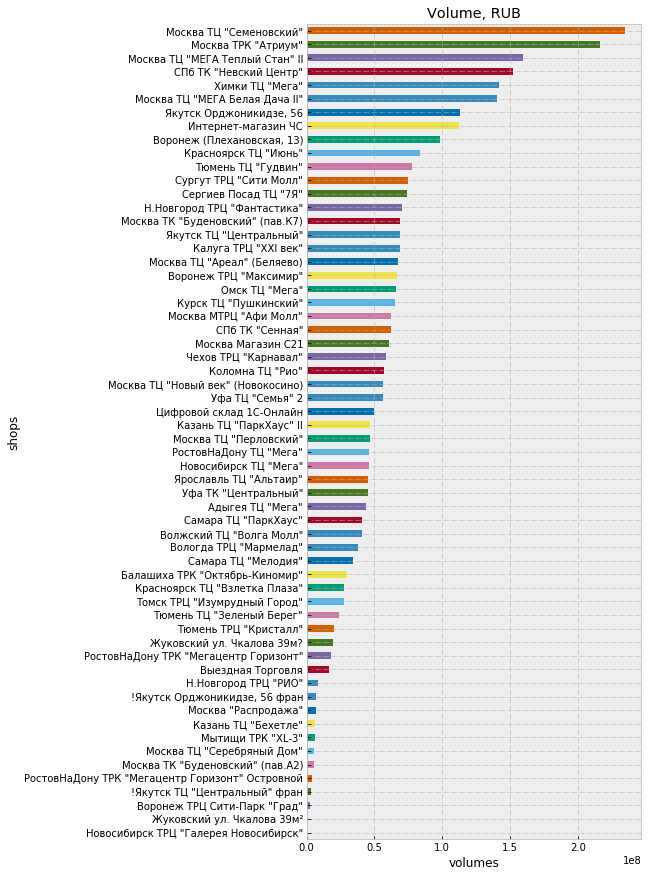

In [12]:
fig, ax = plt.subplots(figsize=(6,15))
prices.plot(kind='barh', ax=ax, title='Volume, RUB')
ax.set_xlabel('volumes')
ax.set_ylabel('shops')
plt.show()

In [13]:
df_test_a = pd.merge(df_test, df_items, on='item_id')
df_test_a = pd.merge(df_test_a, df_cat, on='item_category_id')
df_test_a = pd.merge(df_test_a, df_shop, on='shop_id')
df_test_a = df_test_a.drop(columns=['shop_id', 'item_id', 'item_category_id'])
df_test_a = df_test_a.sort_values(by='ID')
df_test_a.head()

,ID,item_name,item_category_name,shop_name
0,0,"NHL 15 [PS3, русские субтитры]",Игры - PS3,"Вологда ТРЦ ""Мармелад"""
140,1,ONE DIRECTION Made In The A.M.,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад"""
1,2,"Need for Speed Rivals (Essentials) [PS3, русск...",Игры - PS3,"Вологда ТРЦ ""Мармелад"""
812,3,"Need for Speed Rivals (Classics) [Xbox 360, ру...",Игры - XBOX 360,"Вологда ТРЦ ""Мармелад"""
960,4,"Need for Speed [PS4, русская версия]",Игры - PS4,"Вологда ТРЦ ""Мармелад"""


### Is there goods in test selection, which are not in train selection?

In [14]:
test_items = set(df_test_a['item_name'])
train_items = set(df_train_a['item_name'])
print('There is {} new goods in test'.format(len(set.difference(test_items, train_items))))

There is 363 new goods in test


In [15]:
set.difference(test_items, train_items)

{'12/ДВЕНАДЦАТЬ (СР) (Регион)',
 '1С:Аудиокниги. Аладдин и другие восточные сказки (Jewel)',
 '1С:Аудиокниги. Аудиокурсы по географии. 6 класс  [PC, Цифровая версия]',
 '1С:Аудиокниги. Аудиоэнциклопедия для самых маленьких. Окружающий мир (Digipack)',
 '1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Цифровая версия]',
 '1С:Аудиокниги. Для самых маленьких. Сказки, потешки и песенки для детей до трех лет (Digipack)',
 '1С:Аудиокниги. Жюль Верн. Пятнадцатилетний капитан (Jewel)',
 '1С:Аудиокниги. Илья Ильин. Если бы я был робинзоном. Забавные рассказы от главного редактора журнала "Ералаш"[PC, Цифровая версия]',
 '1С:Аудиокниги. Лопатина И. Крапиты. Часть 1',
 '1С:Аудиокниги. Чарская Л. А. Сказки голубой феи    [PC, Цифровая версия]',
 '1С:Аудиотеатр. Истории о смелых и находчивых. Коллекция детских аудиоспектаклей (Digipack)',
 '1С:Аудиотеатр. Коллекция сказок А. Усачева (Digipack)',
 '1С:Аудиотеатр. Сказки для мальчиков (Digipack)',
 '1С:Бухгалтерия 8 как на ладони (издание 6)  [Цифровая в

### Obviously new games were released in November 2015, such as Fallout 4, Witcher, etc. 
 So, one can expect, that new goods on market should have more sells, than old goods

In [16]:
month_groups = df_train_a.groupby('date_block_num')

In [17]:
mprices = list()
for g in list(month_groups.groups.keys()):
    prices = month_groups.get_group(g).groupby('shop_name')['full_price'].sum()
    prices = prices.sort_values()
    mprices.append(prices)

In [18]:
df_mprices = pd.DataFrame()
for i in range(len(mprices)):
    df_mprices[i] = mprices[i]
df_mprices = df_mprices.fillna(value=0.0)
df_mprices = df_mprices.transpose()
df_mprices.head()

shop_name,"Казань ТЦ ""Бехетле""","Балашиха ТРК ""Октябрь-Киномир""",Жуковский ул. Чкалова 39м?,"Москва ТЦ ""Серебряный Дом""","Москва МТРЦ ""Афи Молл""","Самара ТЦ ""Мелодия""","Тюмень ТЦ ""Зеленый Берег""","Воронеж ТРЦ Сити-Парк ""Град""",Интернет-магазин ЧС,"Адыгея ТЦ ""Мега""",...,"Красноярск ТЦ ""Июнь""","Воронеж (Плехановская, 13)","!Якутск Орджоникидзе, 56 фран","Тюмень ТЦ ""Гудвин""","СПб ТК ""Невский Центр""","Москва ТЦ ""МЕГА Теплый Стан"" II","Москва ТЦ ""МЕГА Белая Дача II""","Москва ТРК ""Атриум""","Химки ТЦ ""Мега""","Москва ТЦ ""Семеновский"""
0,225435.0,560585.01,577494.0,824625.0,841233.0,913969.0,939712.0,952881.0,996495.75,1085064.8,...,2742707.0,2743015.0,2966412.0,3030289.5,3031275.0,4718191.23,4728830.0,5376478.13,6193833.58,6334218.71
1,226880.0,584394.00,636783.0,1007056.0,1240899.0,1030422.0,760353.0,762880.0,1370670.70,522339.0,...,3066448.0,2919700.0,3670958.0,2545432.0,3206216.5,3705912.00,3758637.0,5530463.20,4994898.34,7033617.00
2,311521.0,635652.00,596111.0,1314416.0,1523218.0,1214500.7,948077.0,634196.0,1893864.10,732950.0,...,3304036.7,3407397.0,0.0,3089884.0,4119367.0,4581680.03,4378750.0,6655983.20,6058317.00,7977839.22
3,240835.0,399668.00,368563.0,872569.0,1110802.0,845157.0,684992.0,-599.0,1360277.45,614860.0,...,2247598.0,2097684.0,0.0,2178403.5,2780866.0,3128389.00,2863535.0,4772728.00,4033872.00,5618394.00
4,225950.0,470182.00,353021.0,738536.0,930671.0,684877.0,721010.0,0.0,1115095.60,542429.0,...,2443014.0,1912973.0,0.0,2174831.0,2473298.0,3173811.00,2391418.0,4171683.60,3889262.00,5230774.00


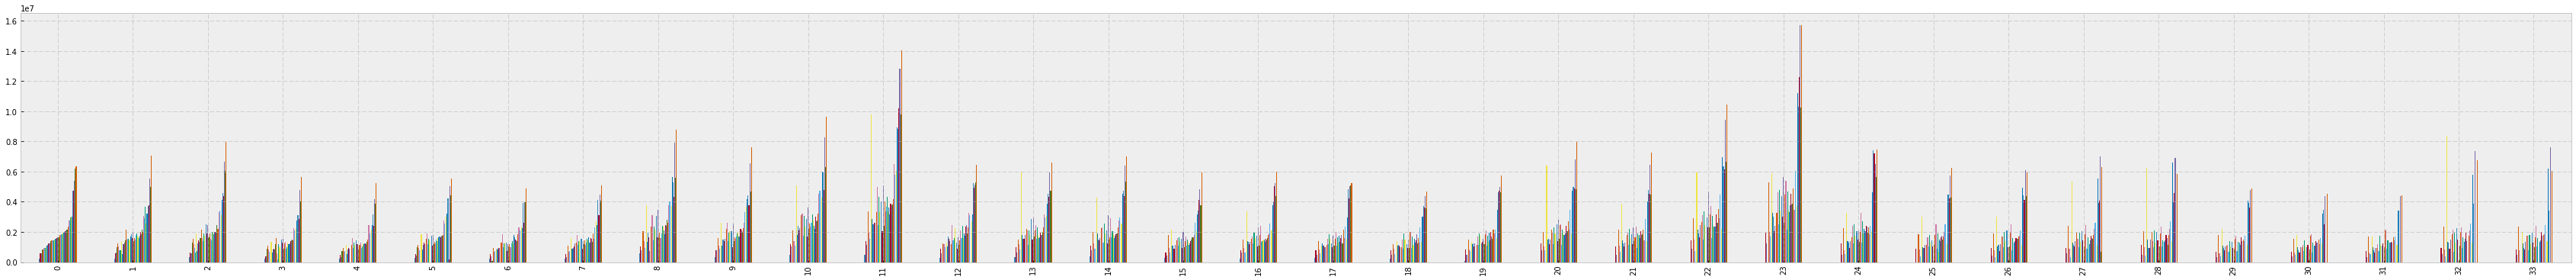

In [19]:
df_mprices.plot(kind='bar', figsize=(60,6), legend=False)
plt.show()

### Volumes increase at Xmas)

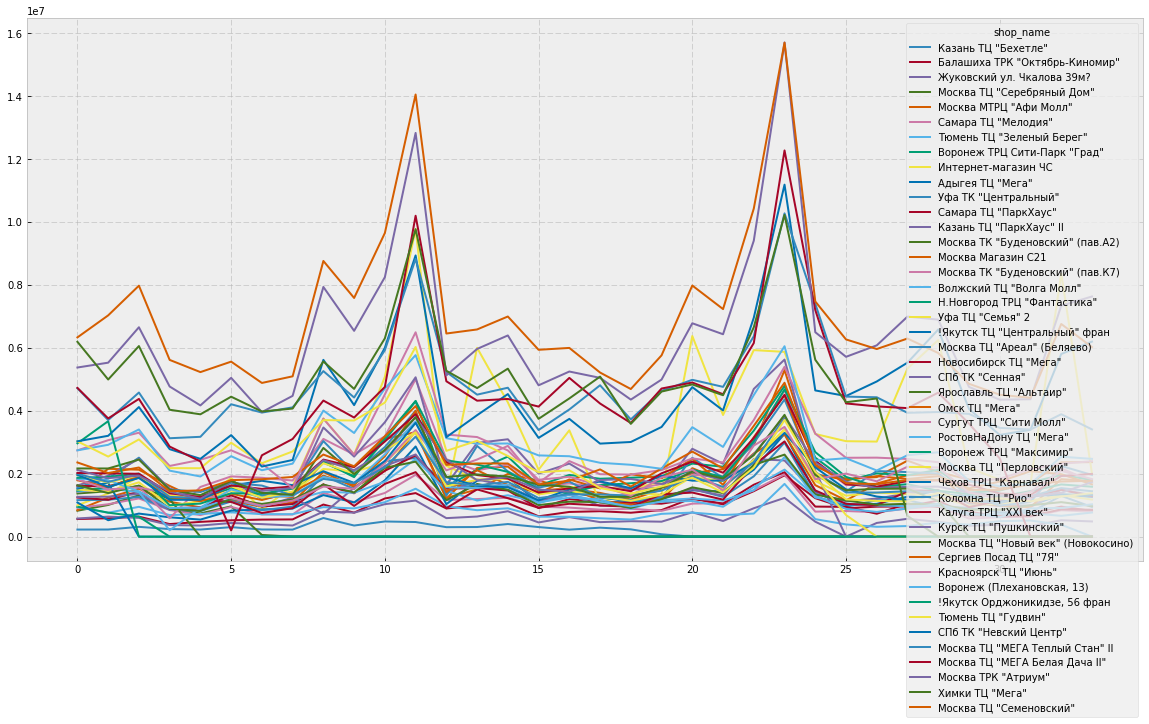

In [20]:
df_mprices.plot(figsize=(20,10))
plt.show()

In [21]:
mgroups = df_train_a.groupby('date_block_num')
mitems = list()
for g in list(mgroups.groups):
    mitems.append(mgroups.get_group(g).groupby('item_name')['item_cnt_day'].sum())

In [22]:
df_mitems = pd.DataFrame()
for i in range(len(mitems)):
    df_mitems[i] = mitems[i]
df_mitems = df_mitems.fillna(value=0.0)
#df_mitems = df_mitems.transpose()
df_mitems.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
item_name,,,,,,,,,,,,,,,,,,,,,
/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"007 Legends [PS3, русская версия]",7.0,3.0,4.0,1.0,2.0,2.0,3.0,1.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"007 Legends [PС, Jewel, русская версия]",8.0,8.0,7.0,6.0,4.0,4.0,7.0,13.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"007 Legends [Xbox 360, русская версия]",4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1+1,299.0,208.0,178.0,97.0,66.0,79.0,87.0,72.0,59.0,58.0,...,42.0,32.0,40.0,20.0,20.0,26.0,21.0,30.0,19.0,22.0


#### Dynamic of top goods by months

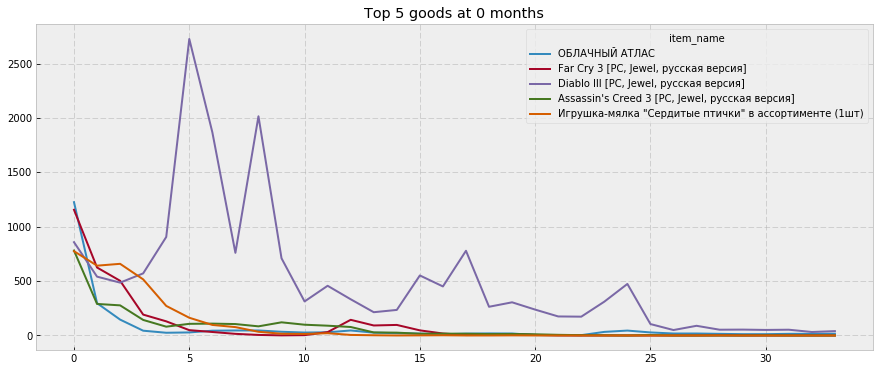

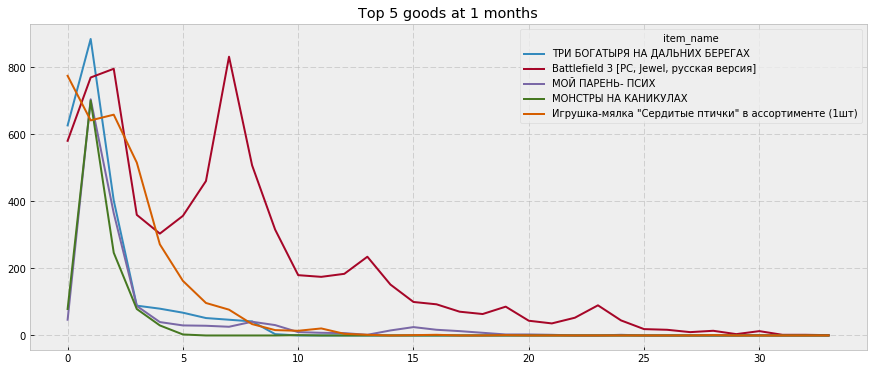

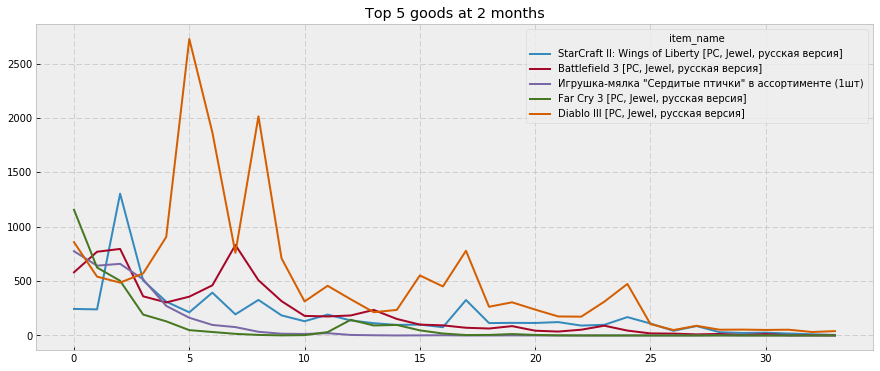

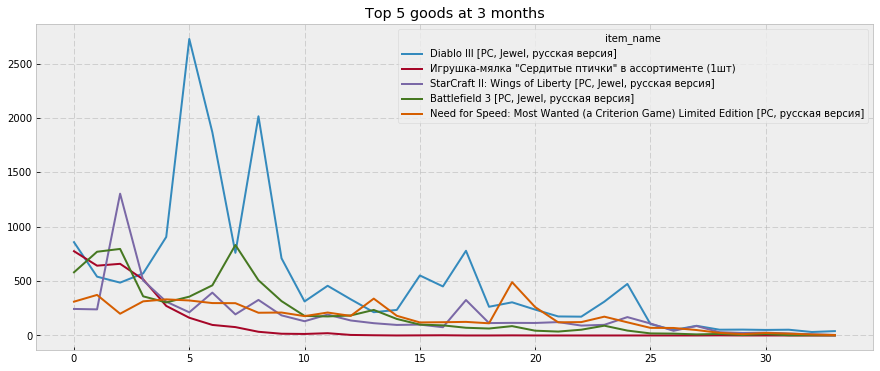

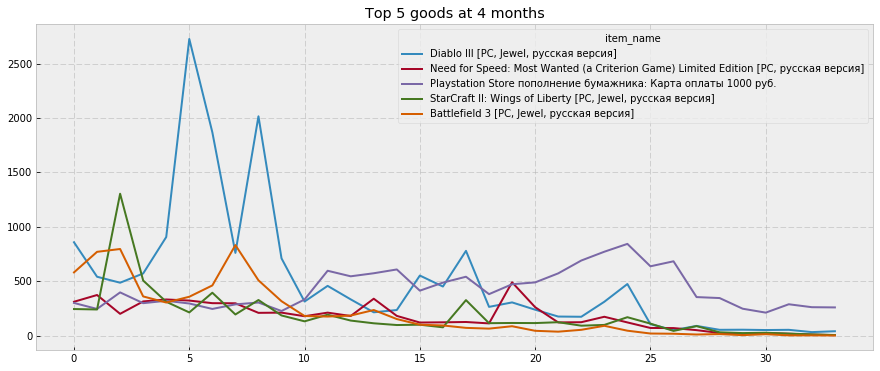

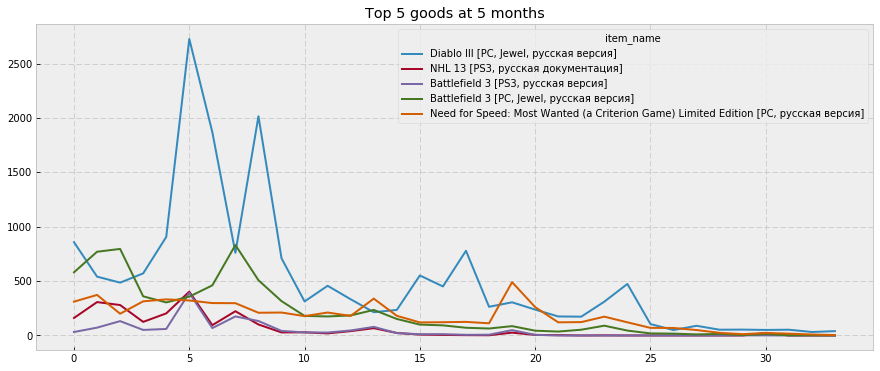

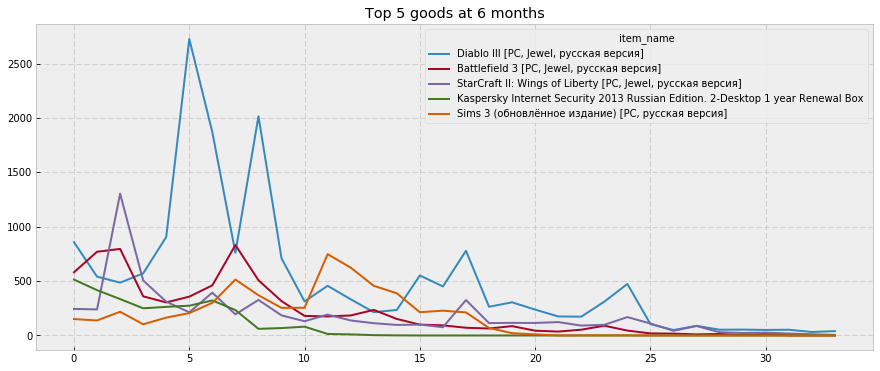

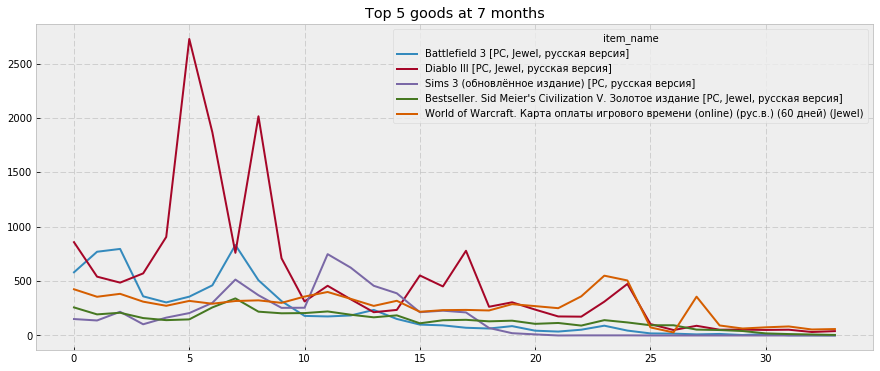

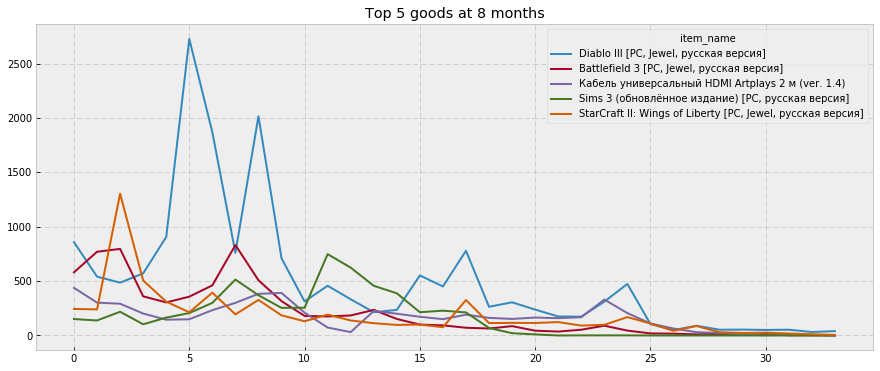

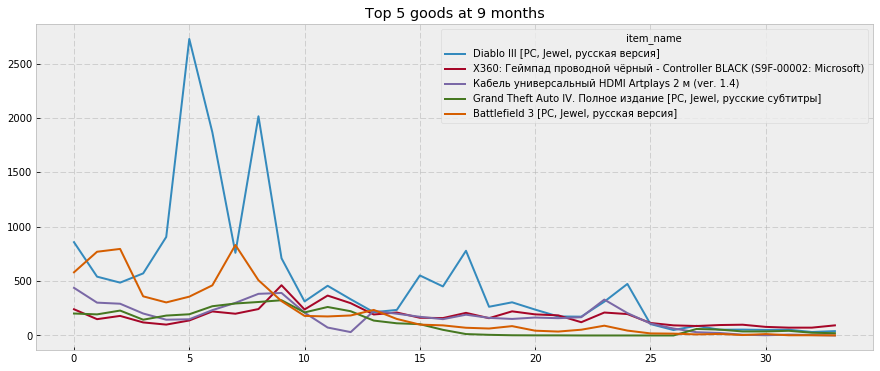

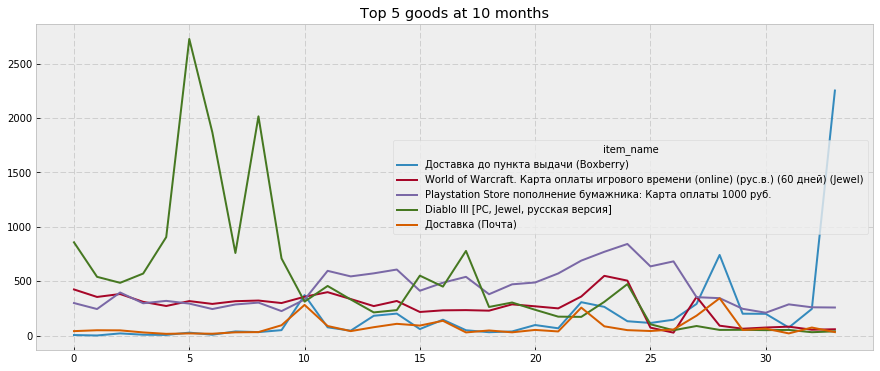

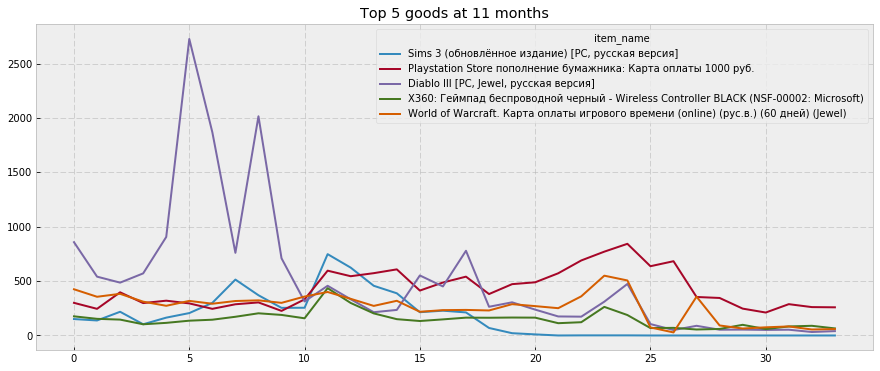

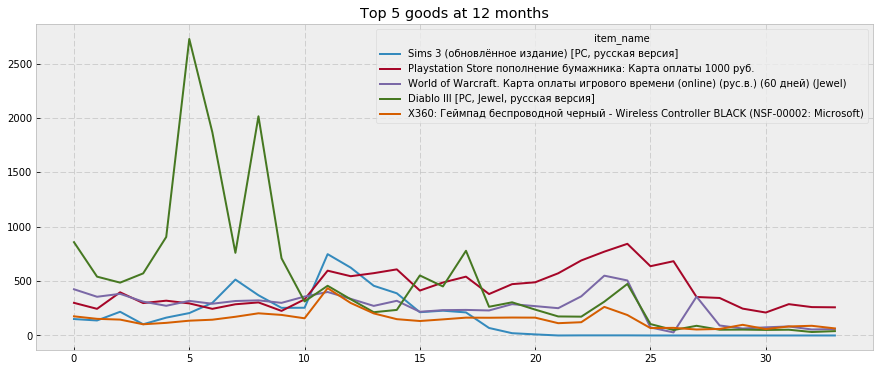

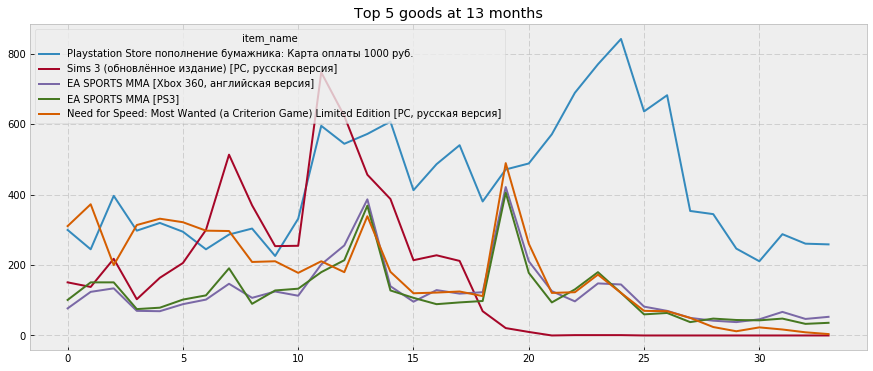

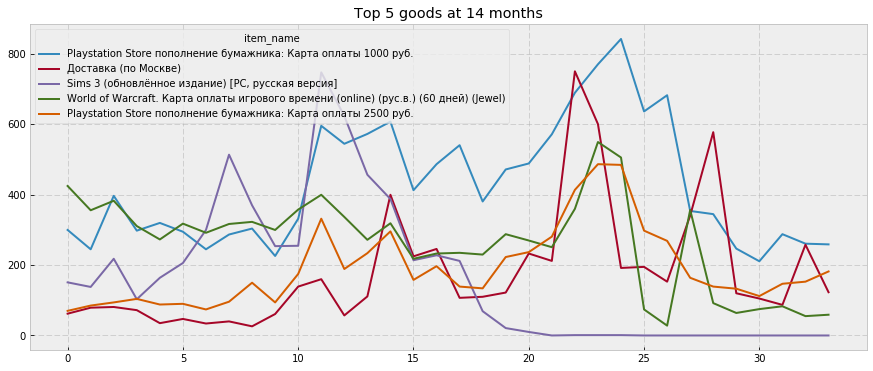

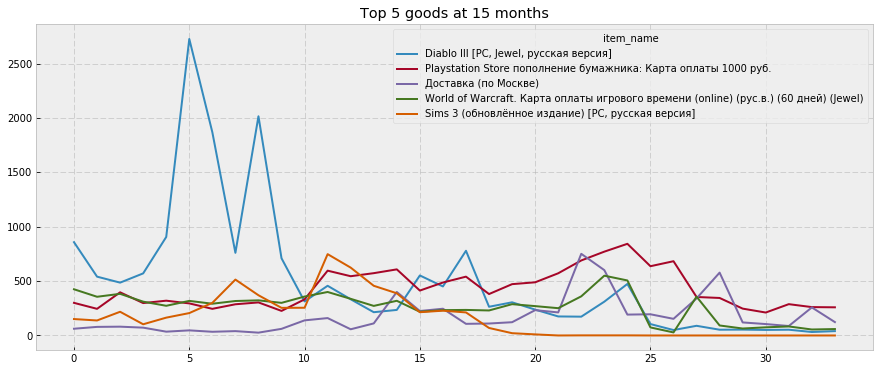

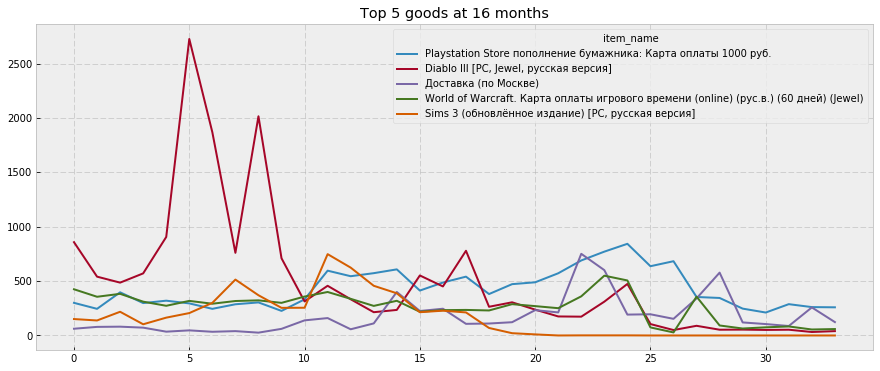

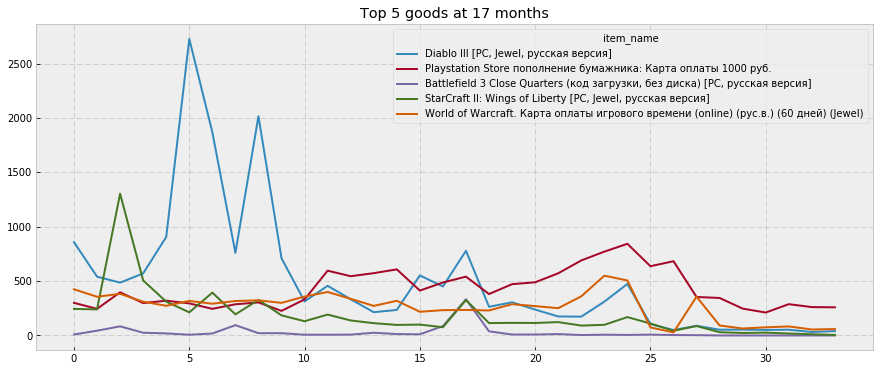

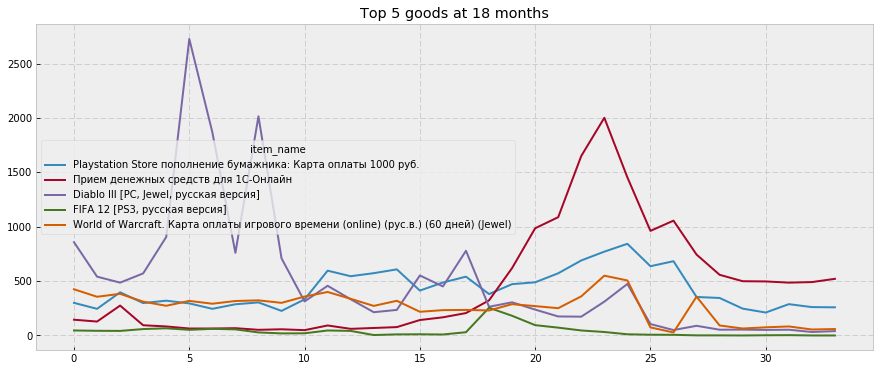

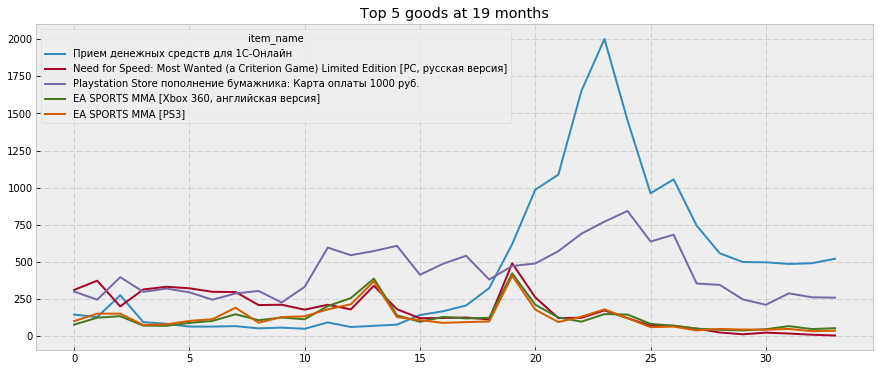

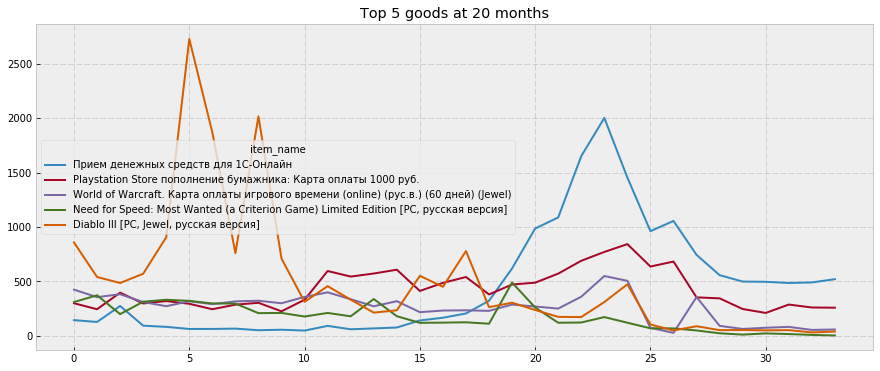

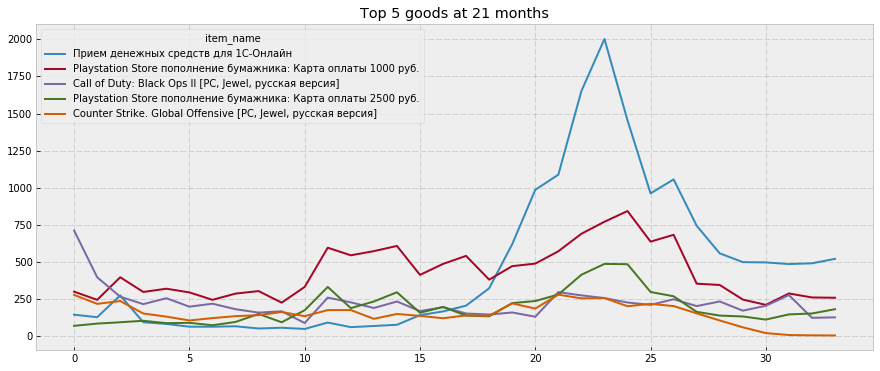

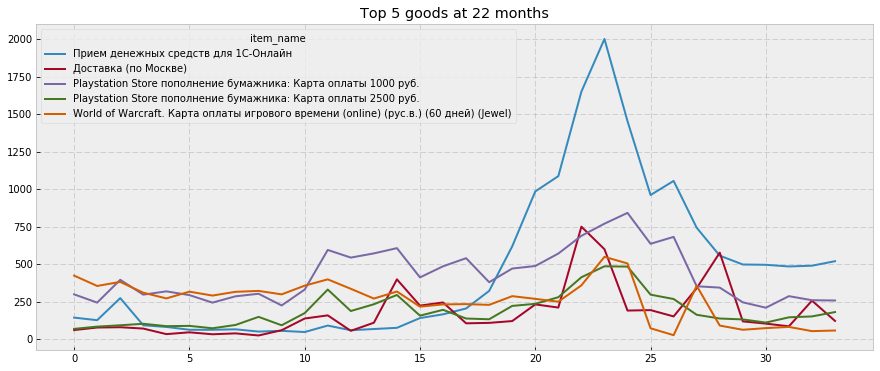

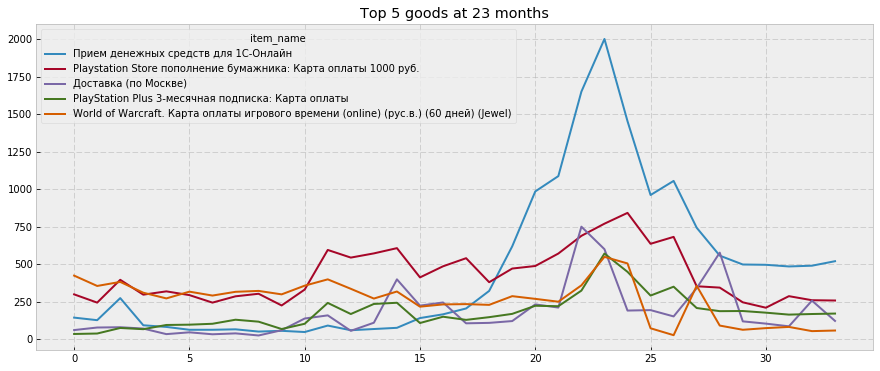

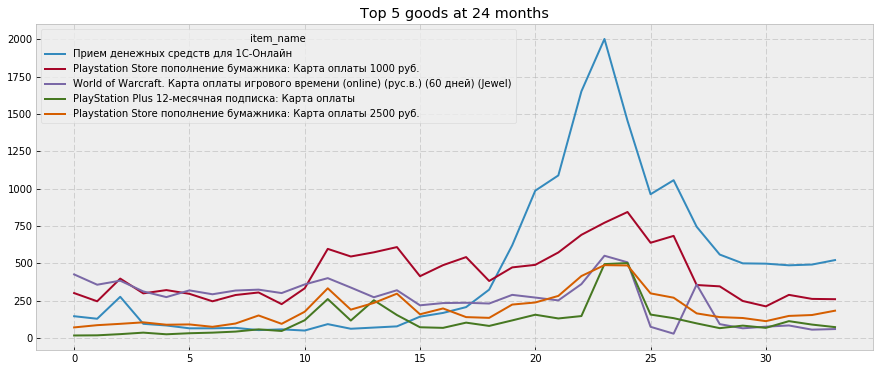

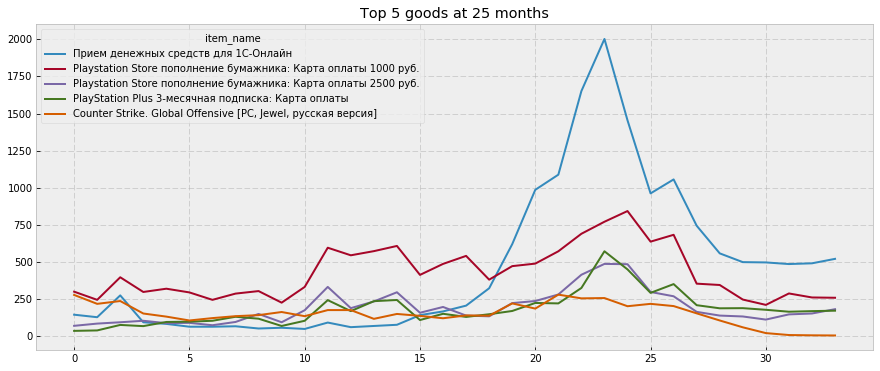

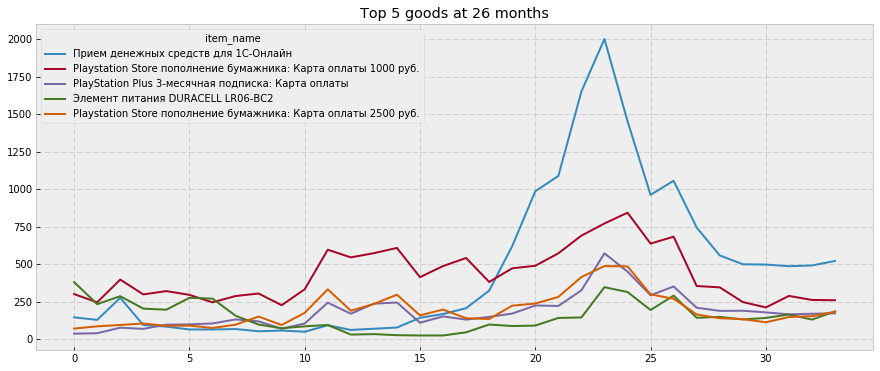

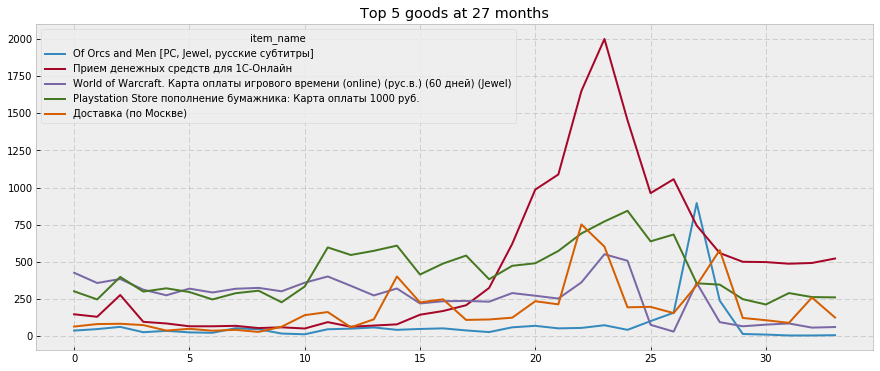

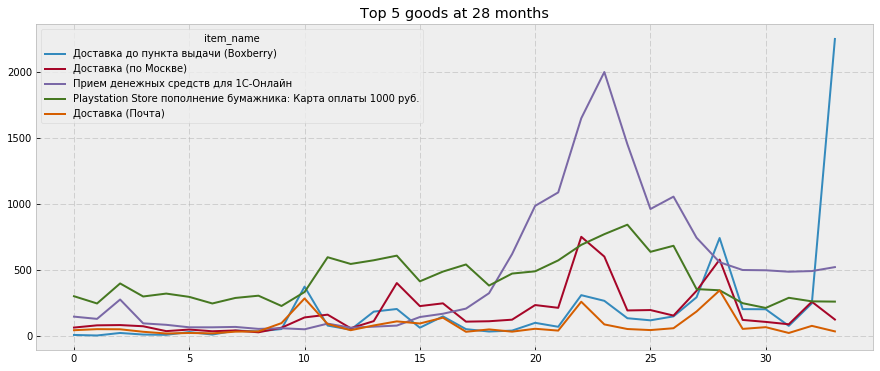

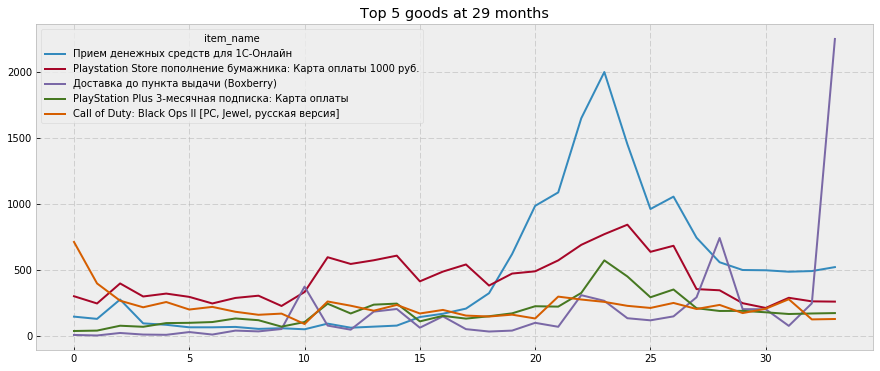

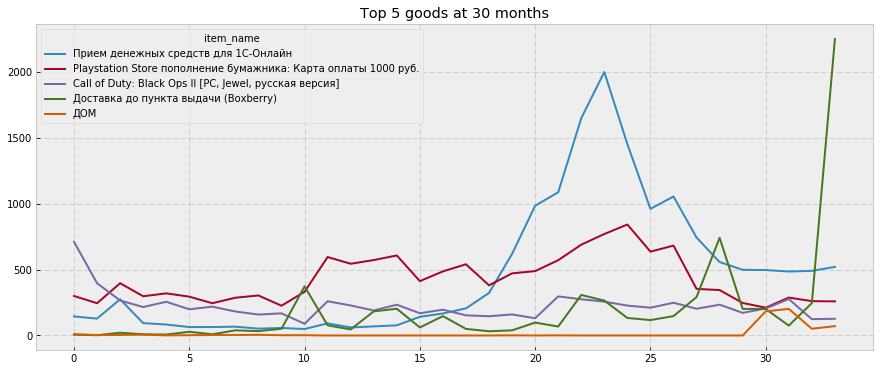

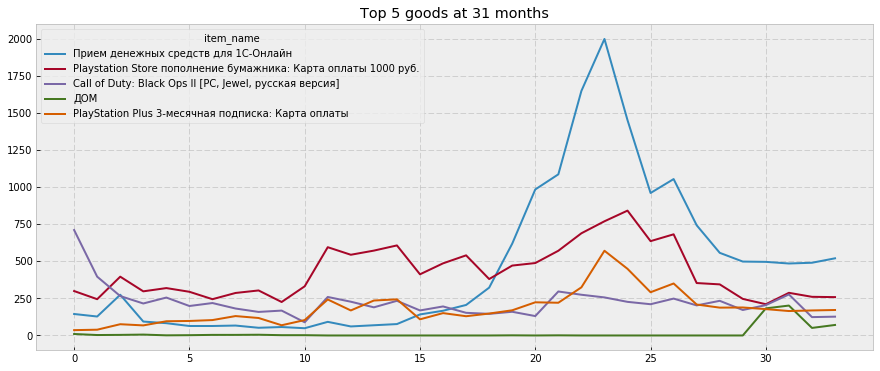

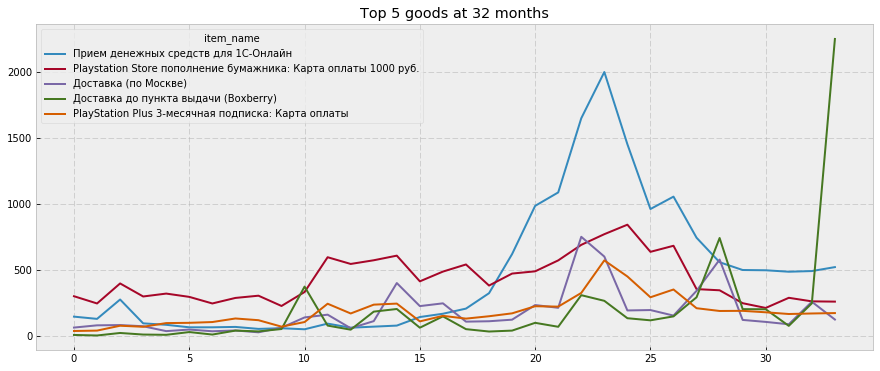

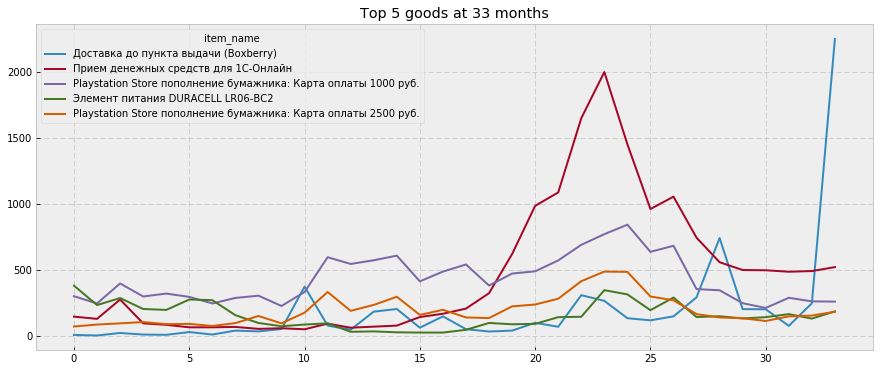

In [23]:
for i in range(34):
    df_mitems.nlargest(5, columns=[i]).transpose().plot(
        figsize=(15,6), 
        title='Top 5 goods at {} months'.format(i)
    )
    plt.show()